# Credit Card Fraud Detection | Finance | AI Capstone | Chaitanya GNB

# Finance

# Problem Statement

- Finance Industry is the biggest consumer of Data Scientists. It faces constant attack by fraudsters, who try to trick the system. Correctly identifying fraudulent transactions is often compared with finding needle in a haystack because of the low event rate. 

- It is important that credit card companies are able to recognize fraudulent credit card transactions so that the customers are not charged for items that they did not purchase.

- You are required to try various techniques such as supervised models with oversampling, unsupervised anomaly detection, and heuristics to get good accuracy at fraud detection.

# Dataset Snapshot

The datasets contain transactions made by credit cards in September 2013 by European cardholders. This dataset represents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. 

Features V1, V2, ... V28 are the principal components obtained with PCA. 

The only features which have not been transformed with PCA are 'Time' and 'Amount'

# Project Task: Week 1 - Exploratory Data Analysis (EDA)

# Project Task: Week 2 - Modeling Techniques

# Project Task: Week 3 - Applying ANN

# Project Task: Week 4 - Inference and Observations

# Project Task: Week 1

Exploratory Data Analysis (EDA):

1.    Perform an EDA on the Dataset.
       a)    Check all the latent features and parameters with their mean and standard deviation. Value are close to 0 centered (mean) with unit standard deviation
       b)    Find if there is any connection between Time, Amount, and the transaction being fraudulent.
2.    Check the class count for each class. It’s a class Imbalance problem.
3.    Use techniques like undersampling or oversampling before running Naïve Bayes, Logistic Regression or SVM.
       a.    Oversampling or undersampling can be used to tackle the class imbalance problem
       b.    Oversampling increases the prior probability of imbalanced class and in case of other classifiers, error gets multiplied as the low-proportionate class is mimicked multiple times.
4.     Following are the matrices for evaluating the model performance: Precision, Recall, F1-Score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project.



In [1]:
# import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
train_df = pd.read_csv("train_data.csv")
test_df = pd.read_csv("test_data.csv")

In [3]:
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0


In [4]:
train_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
227840,62074.0,-1.993953,1.734986,-1.108037,-2.671817,1.605319,3.041992,-0.417771,1.438007,0.945437,...,-0.303532,-0.708199,0.047110,1.008409,0.234363,0.768581,0.697625,0.354542,14.83,0
227841,32193.0,-0.440396,1.062920,1.582218,-0.029761,0.040967,-0.903627,0.730326,-0.108175,-0.513163,...,-0.215794,-0.532224,-0.024762,0.382581,-0.164620,0.068836,0.269144,0.123483,2.58,0
227842,163864.0,0.827820,-2.649344,-3.161235,0.209209,-0.561331,-1.570386,1.612531,-0.930219,-1.318562,...,0.349915,0.002268,-0.746698,0.171847,0.247576,0.936557,-0.258164,0.037868,748.04,0
227843,122571.0,-1.523903,-6.287060,-2.638246,1.330015,-1.672002,1.957509,1.359226,0.081727,0.753151,...,1.329127,0.001210,-1.360187,-1.507703,-1.183927,0.578076,-0.328557,0.229935,1771.50,0
227844,43440.0,-1.608560,0.132746,2.075995,-1.937332,-1.822305,-0.429669,0.247042,0.684452,1.177470,...,0.465181,1.017280,0.173478,0.570107,0.504597,-0.659853,0.175060,0.092039,191.80,0


In [5]:
test_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,113050.0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,...,-0.042711,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89
1,26667.0,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,...,0.926255,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00
2,159519.0,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,...,-0.408289,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70
3,137545.0,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,...,-0.199280,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99
4,63369.0,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,...,0.059880,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00


In [6]:
test_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
56957,136579.0,2.030797,-0.825073,-0.729555,-0.519187,-0.639893,-0.169482,-0.619049,-0.017902,-0.578643,...,-0.458358,-0.790167,-1.825357,0.600083,0.702623,-0.782688,-0.007105,-0.041057,-0.038601,42.42
56958,150070.0,-0.263947,1.119700,-0.639394,-0.880567,1.194120,-0.310693,0.962087,-0.088880,0.386664,...,0.294948,-0.448081,-0.893010,0.004678,0.062555,-0.347536,0.106510,0.274117,-0.036263,7.99
56959,138634.0,2.206867,-0.748559,-1.443015,-1.101542,-0.332197,-0.646931,-0.536272,-0.129437,-0.712381,...,-0.065957,0.471336,1.314052,0.038930,0.747315,0.158017,0.021897,-0.046200,-0.072586,1.00
56960,53907.0,1.430579,-0.842354,0.415998,-1.328439,-1.284654,-0.888110,-0.653237,-0.238164,-2.220845,...,-0.289844,-0.577415,-1.323989,0.336843,0.329714,-0.007425,-0.636401,0.037095,0.029180,30.00
56961,66373.0,-7.792712,5.599937,0.258943,0.061360,-2.586555,4.770837,-8.221863,-20.298380,2.028566,...,-2.136013,12.641459,-4.187308,2.655058,0.350225,0.462620,0.455248,0.166157,0.099680,8.39


In [7]:
train_df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
110895,133439.0,-1.231049,2.724869,-0.278874,3.163884,1.286592,-0.603845,1.177558,0.061443,-1.016965,...,-0.490603,-1.261161,-0.035648,-0.485539,-0.268521,-0.268755,0.561301,0.484230,0.90,0
162883,91724.0,-0.175751,0.676985,-1.020767,-1.896743,0.617919,-1.074800,0.317477,0.101937,0.022297,...,-0.003786,0.013734,0.111473,0.298660,-0.935170,-0.626809,0.069447,0.193541,15.00,0
204076,138661.0,-0.280669,1.006429,0.750681,-0.087169,0.394525,0.134852,0.402144,-0.784754,0.086608,...,0.395116,-1.202706,0.302488,0.533007,-0.896166,-0.760901,0.266583,0.215623,12.99,0
204711,34810.0,0.838093,-0.902561,0.193921,0.507344,-0.574790,0.512545,-0.276439,0.154397,-1.372785,...,-0.064644,-0.071090,-0.152118,-0.301024,0.317771,-0.258698,0.037430,0.044107,199.60,0
87749,50019.0,1.118432,-0.302388,0.857674,0.079198,-1.078374,-0.692718,-0.451337,0.074498,0.305273,...,-0.075788,-0.406493,0.126686,0.547272,-0.091275,0.790155,-0.076884,0.012609,47.49,0
14775,153613.0,1.959027,-0.411098,-0.227409,0.525914,-0.780509,-0.530594,-0.593009,-0.052277,1.435304,...,0.204534,0.858072,0.120249,0.018146,-0.106286,-0.211182,0.045654,-0.035725,13.53,0
76324,37143.0,0.696416,-0.721611,0.089455,1.610328,-0.580222,-0.145075,0.240613,0.046233,0.593071,...,0.019475,-0.362749,-0.248697,0.047476,0.500623,-0.331260,-0.020049,0.053419,250.00,0
30839,67760.0,1.241868,-1.197793,1.725271,-0.128613,-2.095973,0.358886,-1.735495,0.430469,0.934229,...,0.169978,0.804625,-0.002404,0.425398,0.307389,-0.030446,0.092293,0.023680,4.80,0
10358,71409.0,-7.055679,2.985511,-1.542855,-1.433385,-2.762549,2.994251,-8.690392,-15.866487,-1.458450,...,-6.103687,2.627052,1.548108,-0.553503,0.572572,-0.103527,0.347986,-0.132848,10.00,0
181259,71723.0,-0.255470,0.878649,0.716018,0.230194,0.814721,0.015772,1.011637,-0.117285,-0.607768,...,0.049208,0.090279,-0.302129,-0.997084,0.484325,-0.285865,0.023568,0.017883,53.97,0


In [8]:
test_df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
21078,167808.0,2.240865,-1.614612,-2.809162,-2.656085,1.381264,3.155913,-1.313500,0.656904,-1.747419,...,-0.273857,0.094613,0.552125,0.070341,0.722123,0.115548,0.086497,-0.001807,-0.059931,56.98
2689,65889.0,-0.556223,1.233474,0.813216,0.734621,-0.034338,-0.316320,0.313047,0.460355,-0.971920,...,-0.133074,0.223197,0.499406,-0.154693,0.002024,-0.241544,-0.327684,0.039681,0.087205,9.42
38033,156003.0,0.649171,-3.281964,-2.636096,-0.598255,-0.325656,0.935911,0.489847,-0.009050,-0.753038,...,1.373998,0.623920,0.194163,-0.527214,-1.584203,-0.362859,-0.165796,-0.146504,0.035427,764.15
10959,169717.0,2.078461,-0.093211,-1.583122,-0.071747,0.298243,-0.826578,0.262413,-0.244179,0.447497,...,-0.225341,-0.124382,-0.203941,0.121277,-0.481632,0.063745,-0.067881,-0.054242,-0.078465,0.00
43936,147716.0,-0.361092,0.654430,-0.309598,-1.608303,-0.759194,-0.854248,0.344636,0.107875,-1.069189,...,-0.133698,-0.207545,-0.793584,0.260791,-0.231653,-0.769218,-0.764572,-0.248589,-0.021488,99.00
34635,77390.0,-1.789927,1.511551,1.301233,0.879092,-0.257358,1.411572,-0.551406,1.568894,-0.244635,...,-0.143907,-0.080861,-0.049936,0.068367,-0.687974,0.094315,-0.271755,0.269628,0.053318,2.00
57,85107.0,1.302378,-0.606529,-0.681986,-1.904603,1.326623,3.436312,-1.145127,0.959147,1.671302,...,0.005757,-0.064208,-0.080587,-0.072991,1.018136,0.663575,-0.671323,0.096801,0.028697,1.00
41967,63634.0,-0.827459,-0.170457,1.810245,-1.496118,-2.150609,0.396022,-0.838741,0.601656,-2.730064,...,-0.310141,0.127965,0.586671,-0.069603,0.201384,-0.000729,0.072907,-0.089783,-0.021876,106.00
46888,58200.0,-0.625399,-0.981114,1.267102,-2.816347,0.168469,0.076234,-0.782168,0.258627,-2.283743,...,-0.178835,-0.308513,-0.861292,-0.100243,-1.487119,-0.045657,-0.471297,0.075353,0.096175,20.00
20069,70598.0,-5.614216,4.805541,-2.624767,-0.112364,-2.304921,3.344486,-7.239951,-11.118733,-1.814785,...,2.841258,-6.041640,1.988098,1.300151,-1.375174,-0.925290,0.978445,-1.960744,-0.174980,39.09


In [9]:
print(train_df.columns)
print(test_df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [10]:
print(train_df.shape)
print(test_df.shape)

(227845, 31)
(56962, 30)


In [11]:
print(train_df.count())
print(test_df.count())

Time      227845
V1        227845
V2        227845
V3        227845
V4        227845
V5        227845
V6        227845
V7        227845
V8        227845
V9        227845
V10       227845
V11       227845
V12       227845
V13       227845
V14       227845
V15       227845
V16       227845
V17       227845
V18       227845
V19       227845
V20       227845
V21       227845
V22       227845
V23       227845
V24       227845
V25       227845
V26       227845
V27       227845
V28       227845
Amount    227845
Class     227845
dtype: int64
Time      56962
V1        56962
V2        56962
V3        56962
V4        56962
V5        56962
V6        56962
V7        56962
V8        56962
V9        56962
V10       56962
V11       56962
V12       56962
V13       56962
V14       56962
V15       56962
V16       56962
V17       56962
V18       56962
V19       56962
V20       56962
V21       56962
V22       56962
V23       56962
V24       56962
V25       56962
V26       56962
V27       56962
V28       56

In [12]:
print(train_df.dtypes.value_counts())
print(test_df.dtypes.value_counts())

float64    30
int64       1
dtype: int64
float64    30
dtype: int64


In [13]:
print(train_df.shape)
print(test_df.shape)

(227845, 31)
(56962, 30)


In [14]:
# let's see total number of rows and columns in train data and test data
print("Total number of rows in training data:", train_df.shape[0])
print("Total number of columns in training data:", train_df.shape[1])
print("Total number of rows in test data:", test_df.shape[0])
print("Total number of columns in test data:", test_df.shape[1])

Total number of rows in training data: 227845
Total number of columns in training data: 31
Total number of rows in test data: 56962
Total number of columns in test data: 30


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  float64
 1   V1      227845 non-null  float64
 2   V2      227845 non-null  float64
 3   V3      227845 non-null  float64
 4   V4      227845 non-null  float64
 5   V5      227845 non-null  float64
 6   V6      227845 non-null  float64
 7   V7      227845 non-null  float64
 8   V8      227845 non-null  float64
 9   V9      227845 non-null  float64
 10  V10     227845 non-null  float64
 11  V11     227845 non-null  float64
 12  V12     227845 non-null  float64
 13  V13     227845 non-null  float64
 14  V14     227845 non-null  float64
 15  V15     227845 non-null  float64
 16  V16     227845 non-null  float64
 17  V17     227845 non-null  float64
 18  V18     227845 non-null  float64
 19  V19     227845 non-null  float64
 20  V20     227845 non-null  float64
 21  V21     22

In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    56962 non-null  float64
 1   V1      56962 non-null  float64
 2   V2      56962 non-null  float64
 3   V3      56962 non-null  float64
 4   V4      56962 non-null  float64
 5   V5      56962 non-null  float64
 6   V6      56962 non-null  float64
 7   V7      56962 non-null  float64
 8   V8      56962 non-null  float64
 9   V9      56962 non-null  float64
 10  V10     56962 non-null  float64
 11  V11     56962 non-null  float64
 12  V12     56962 non-null  float64
 13  V13     56962 non-null  float64
 14  V14     56962 non-null  float64
 15  V15     56962 non-null  float64
 16  V16     56962 non-null  float64
 17  V17     56962 non-null  float64
 18  V18     56962 non-null  float64
 19  V19     56962 non-null  float64
 20  V20     56962 non-null  float64
 21  V21     56962 non-null  float64
 22

In [17]:
train_df.Class.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [18]:
train_df.Class.value_counts(normalize=True)*100

0    99.827075
1     0.172925
Name: Class, dtype: float64

In [19]:
train_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [20]:
test_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object

In [21]:
valid_tran = train_df[train_df['Class'] == 0]
fraud_tran = train_df[train_df['Class'] == 1]

fraud_valid_percent = len(fraud_tran)/len(valid_tran)

print(fraud_valid_percent)
print('Fradulent transactions: ', len(fraud_tran))
print('Valid transactions: ', len(valid_tran))

0.0017322412299792043
Fradulent transactions:  394
Valid transactions:  227451


In [22]:
valid_tran = test_df[train_df['Class'] == 0]
fraud_tran = test_df[train_df['Class'] == 1]

fraud_valid_percent = len(fraud_tran)/len(valid_tran)

print(fraud_valid_percent)
print('Fradulent transactions: ', len(fraud_tran))
print('Valid transactions: ', len(valid_tran))

0.0017938797045374604
Fradulent transactions:  102
Valid transactions:  56860


In [23]:
train_df.nunique()

Time      113960
V1        221405
V2        221405
V3        221405
V4        221405
V5        221405
V6        221405
V7        221405
V8        221405
V9        221405
V10       221405
V11       221405
V12       221405
V13       221405
V14       221405
V15       221405
V16       221405
V17       221405
V18       221405
V19       221405
V20       221405
V21       221405
V22       221405
V23       221405
V24       221405
V25       221405
V26       221405
V27       221405
V28       221405
Amount     29334
Class          2
dtype: int64

In [24]:
test_df.nunique()

Time      46715
V1        56287
V2        56287
V3        56287
V4        56287
V5        56287
V6        56287
V7        56287
V8        56287
V9        56287
V10       56287
V11       56287
V12       56287
V13       56287
V14       56287
V15       56287
V16       56287
V17       56287
V18       56287
V19       56287
V20       56287
V21       56287
V22       56287
V23       56287
V24       56287
V25       56287
V26       56287
V27       56287
V28       56287
Amount    13700
dtype: int64

In [25]:
train_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [26]:
test_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [27]:
train_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94752.853076,-0.003321,-0.001652,0.001066,-0.000374,0.000877,0.000770,-0.000035,0.001625,-0.000391,...,0.000563,0.001234,-0.001002,0.000254,0.000218,-0.001128,-0.000346,0.000498,88.522327,0.001729
std,47500.410602,1.963028,1.661178,1.516107,1.415061,1.367074,1.325341,1.220384,1.192648,1.097367,...,0.734187,0.724544,0.625165,0.606012,0.521348,0.482314,0.400286,0.331184,248.100141,0.041548
min,0.000000,-56.407510,-72.715728,-32.965346,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54182.000000,-0.922851,-0.598040,-0.889246,-0.848884,-0.690811,-0.767803,-0.554761,-0.207838,-0.643365,...,-0.228031,-0.540792,-0.162264,-0.354099,-0.317450,-0.327910,-0.070986,-0.053117,5.590000,0.000000
50%,84607.000000,0.012663,0.066665,0.182170,-0.019309,-0.055243,-0.273025,0.040409,0.022928,-0.050932,...,-0.028807,0.008697,-0.011614,0.041212,0.016221,-0.053257,0.001315,0.011216,22.000000,0.000000
75%,139340.000000,1.314821,0.804401,1.029449,0.744822,0.610852,0.400298,0.570631,0.327854,0.596671,...,0.186852,0.529535,0.147067,0.440051,0.351214,0.239885,0.091105,0.078458,77.070000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,6.070850,3.463246,12.152401,33.847808,19656.530000,1.000000


In [28]:
test_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,...,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000
mean,95057.882360,0.013286,0.006610,-0.004263,0.001496,-0.003508,-0.003079,0.000141,-0.006501,0.001564,...,-0.002685,-0.002253,-0.004938,0.004008,-0.001017,-0.000872,0.004513,0.001385,-0.001990,87.658797
std,47438.688395,1.941231,1.611224,1.516853,1.419107,1.431731,1.359647,1.301800,1.201138,1.103688,...,0.764450,0.735871,0.730301,0.621623,0.604191,0.521003,0.481857,0.416750,0.325640,258.042879
min,2.000000,-36.510583,-47.429676,-48.325589,-5.560118,-113.743307,-20.054615,-28.215112,-41.484823,-9.481456,...,-54.497720,-21.620120,-8.593642,-32.828995,-2.822684,-8.696627,-1.778061,-8.878665,-15.430084,0.000000
25%,54286.250000,-0.908591,-0.600208,-0.893961,-0.847617,-0.694059,-0.770145,-0.551096,-0.211190,-0.642072,...,-0.211598,-0.230210,-0.549030,-0.160179,-0.356599,-0.315738,-0.322766,-0.070204,-0.052351,5.615000
50%,85226.500000,0.036251,0.061840,0.170910,-0.022094,-0.051828,-0.278939,0.039155,0.019903,-0.052607,...,-0.061739,-0.032379,-0.000329,-0.009334,0.040045,0.018074,-0.047859,0.001451,0.011354,21.900000
75%,139235.000000,1.319727,0.801163,1.016897,0.738688,0.615454,0.392801,0.569769,0.324905,0.599634,...,0.131241,0.184809,0.524484,0.149985,0.437657,0.348895,0.245286,0.090737,0.077483,77.500000
max,172785.000000,2.446505,18.902453,3.985446,15.304184,29.016124,73.301626,120.589494,18.282168,10.370658,...,19.746453,22.614889,6.790452,20.803344,4.584549,7.519589,3.517346,31.612198,22.620072,25691.160000


In [29]:
for i in train_df.columns:
    print(i, ':', len(train_df[i].unique()))
    print(train_df[i].unique())
    print('==='*25)

Time : 113960
[38355. 22555.  2431. ... 62573. 57317. 32193.]
V1 : 221405
[ 1.04394859 -1.66515873 -0.32409561 ...  0.82782046 -1.52390327
 -1.60856031]
V2 : 221405
[ 0.31855535  0.80844011  0.60183593 ... -2.64934391 -6.28705968
  0.13274555]
V3 : 221405
[ 1.04581044  1.80562731  0.86532936 ... -3.16123463 -2.6382459
  2.07599549]
V4 : 221405
[ 2.80598912  1.90341601 -2.13800033 ...  0.20920895  1.33001517
 -1.9373321 ]
V5 : 221405
[-0.56111301 -0.82162692  0.29466257 ... -0.56133095 -1.67200217
 -1.82230513]
V6 : 221405
[-0.36795603  0.93478952 -1.25155283 ... -1.57038596  1.95750884
 -0.42966946]
V7 : 221405
[ 0.03273593 -0.82480183  1.07211398 ...  1.61253111  1.35922604
  0.24704166]
V8 : 221405
[-0.04233267  0.97589003 -0.33489569 ... -0.93021907  0.08172698
  0.6844515 ]
V9 : 221405
[-0.3226742   1.74746901  1.07126816 ... -1.31856217  0.75315098
  1.17746962]
V10 : 221405
[ 0.49916701 -0.658751   -1.10952241 ...  0.68432675 -0.70231636
 -2.0639348 ]
V11 : 221405
[-0.57266518  1

In [30]:
for i in test_df.columns:
    print(i, ':', len(test_df[i].unique()))
    print(test_df[i].unique())
    print('==='*25)

Time : 46715
[113050.  26667. 159519. ... 136579. 150070.  66373.]
V1 : 56287
[ 0.11469729 -0.0393177   2.27570609 ...  2.20686736  1.43057893
 -7.7927123 ]
V2 : 56287
[ 0.79630332  0.49578391 -1.53150791 ... -0.74855926 -0.84235356
  5.5999372 ]
V3 : 56287
[-0.14955297 -0.81088417 -1.02196871 ... -1.44301505  0.41599776
  0.25894282]
V4 : 56287
[-0.82301091  0.54669263 -1.60215215 ... -1.1015418  -1.32843936
  0.06135977]
V5 : 56287
[ 0.87876293  1.98625685 -1.2203287  ... -0.33219678 -1.28465418
 -2.58655545]
V6 : 56287
[-0.55315167  4.38634231 -0.46237557 ... -0.64693139 -0.88811044
  4.77083666]
V7 : 56287
[ 0.93925861 -1.34489075 -1.19648503 ... -0.53627195 -0.65323694
 -8.22186314]
V8 : 56287
[ -0.10850208  -1.74373589  -0.14705819 ...  -0.12943736  -0.23816392
 -20.29837984]
V9 : 56287
[ 0.11113714 -0.563103   -0.95022367 ... -0.71238103 -2.22084525
  2.02856635]
V10 : 56287
[-0.39052109 -0.61631536  1.56046324 ...  1.05761591  1.35084483
 -0.03069418]
V11 : 56287
[-1.94954563 -

In [31]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})

In [32]:
inspect_data(test_df)

,Data Type,No of Levels,Levels
Time,float64,46715,[113050. 26667. 159519. ... 136579. 150070. ...
V1,float64,56287,[ 0.11469729 -0.0393177 2.27570609 ... 2.20...
V2,float64,56287,[ 0.79630332 0.49578391 -1.53150791 ... -0.74...
V3,float64,56287,[-0.14955297 -0.81088417 -1.02196871 ... -1.44...
V4,float64,56287,[-0.82301091 0.54669263 -1.60215215 ... -1.10...
V5,float64,56287,[ 0.87876293 1.98625685 -1.2203287 ... -0.33...
V6,float64,56287,[-0.55315167 4.38634231 -0.46237557 ... -0.64...
V7,float64,56287,[ 0.93925861 -1.34489075 -1.19648503 ... -0.53...
V8,float64,56287,[ -0.10850208 -1.74373589 -0.14705819 ... -...
V9,float64,56287,[ 0.11113714 -0.563103 -0.95022367 ... -0.71...


In [33]:
### The function compare_train_test compares the training and testing dataset to check if the same set of 
### categorical values are present in both the dataframes.
def compare_train_test(train_data, test_data):
    train_levels = train_data.apply(lambda x: set(x.unique()),axis=0)
    test_levels = test_data.apply(lambda x: set(x.unique()),axis=0)
    extra = []
    missing = []
    for x1,x2 in zip(train_levels, test_levels):
        missing.append(x1-x2)
        extra.append(x2-x1)
    
    return pd.DataFrame({"Train Data Type":train_data.dtypes, "Test Data Type":test_data.dtypes,
                         "Train #Levels":train_data.apply(lambda x: x.unique().shape[0],axis=0), "Test #Levels":test_data.apply(lambda x: x.unique().shape[0],axis=0),
                         "Test Missing":missing, "Test Extra":extra})

In [34]:
compare_train_test(train_df.drop('Class', axis=1), test_df)

,Train Data Type,Test Data Type,Train #Levels,Test #Levels,Test Missing,Test Extra
Time,float64,float64,113960,46715,"{0.0, 1.0, 131072.0, 131074.0, 4.0, 131075.0, ...","{163840.0, 65539.0, 32773.0, 131079.0, 131083...."
V1,float64,float64,221405,56287,"{-0.65947306551152, 1.3458249498442, 2.0993250...","{0.580234264683952, 1.80624878189235, 2.115888..."
V2,float64,float64,221405,56287,"{-0.422003911289039, 1.22739284387103, 2.25691...","{0.9021144909991108, 1.3706580395841002, 2.249..."
V3,float64,float64,221405,56287,"{0.710847984729071, 1.98029530752774, 2.773661...","{0.281822150848825, 1.56511450324615, 2.128879..."
V4,float64,float64,221405,56287,"{0.321469680487553, 1.0374410021049698, 2.2110...","{0.66406731383222, 1.69517498097116, 2.0760297..."
V5,float64,float64,221405,56287,"{0.8955619521514109, 1.19134334882051, -0.6856...","{-0.888716388044827, 1.03892904713382, 1.49850..."
V6,float64,float64,221405,56287,"{-0.9498395373773292, 1.27363702495677, 1.1709...","{-0.753301277641981, -0.19670438560746106, 2.6..."
V7,float64,float64,221405,56287,"{-0.675108718076217, -0.321620235491082, 1.008...","{-0.329756965929505, 1.64736988130619, 0.23680..."
V8,float64,float64,221405,56287,"{-0.0873529639352455, 0.184570034369699, 0.183...","{0.6713924123266679, 0.186235018295406, 2.2459..."
V9,float64,float64,221405,56287,"{-0.559623480838809, 1.6690260865507298, 2.125...","{-0.864469044928228, 1.25873152369104, 2.05165..."


In [35]:
# checking for null values in train_data
train_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [36]:
# checking for null values in train_data
test_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [37]:
# Fraudulent vs Valid transactions
valid = train_df.Class.value_counts()[0]
fraud = train_df.Class.value_counts()[1]

fraud_percent = (fraud/(fraud+valid))*100
valid_percent = (valid/(valid+fraud))*100

print('Number of Fradulent transactions are ', fraud, ' which is equivalent to ', fraud_percent, ' %')
print('Number of Fradulent transactions are ', valid, ' which is equivalent to ', valid_percent, ' %')

Number of Fradulent transactions are  394  which is equivalent to  0.17292457591783889  %
Number of Fradulent transactions are  227451  which is equivalent to  99.82707542408215  %


Text(0, 0.5, 'Frequency')

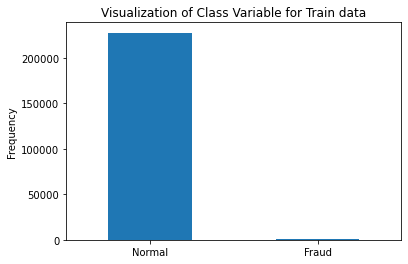

In [38]:
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(train_df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Visualization of Class Variable for Train data")
plt.xticks(range(2), LABELS)
plt.ylabel("Frequency")

<Figure size 432x288 with 0 Axes>

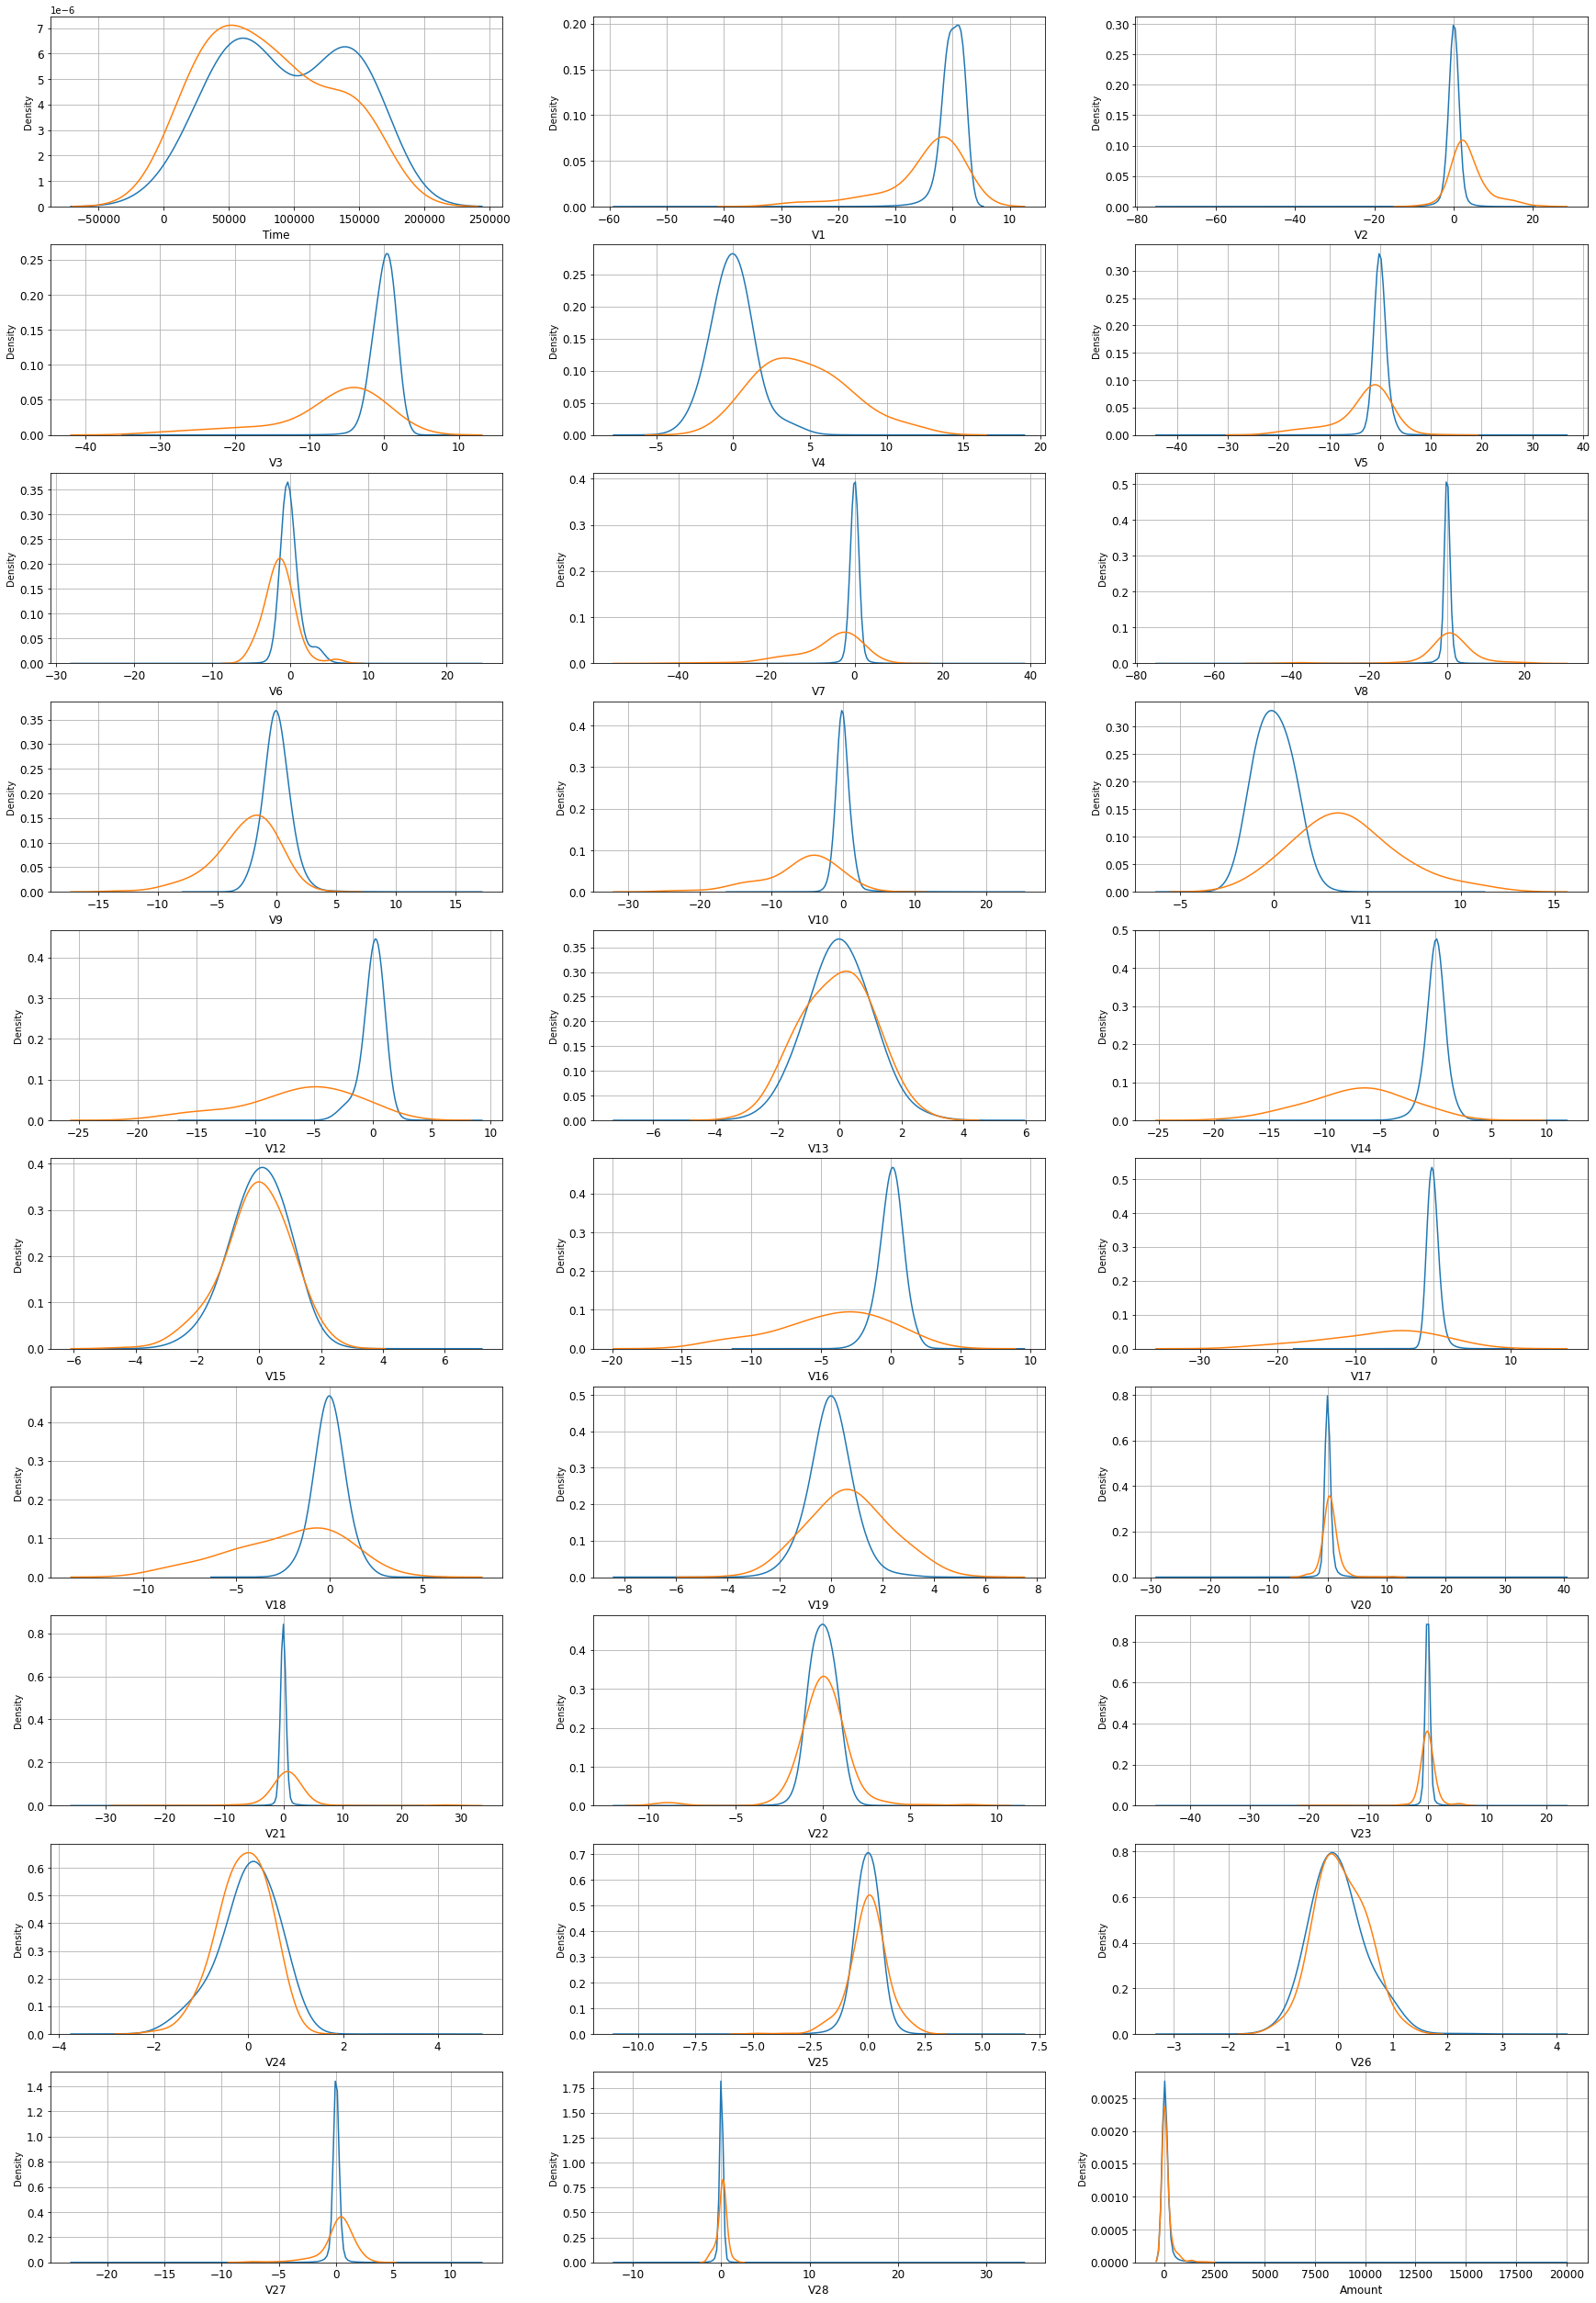

In [39]:
# Plotting all the variable in displot to visualise the distribution
var = list(train_df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = train_df.loc[train_df['Class'] == 0]
t1 = train_df.loc[train_df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(10,3,figsize=(30,45));

for feature in var:
    i += 1
    plt.subplot(10,3,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid()
plt.show()

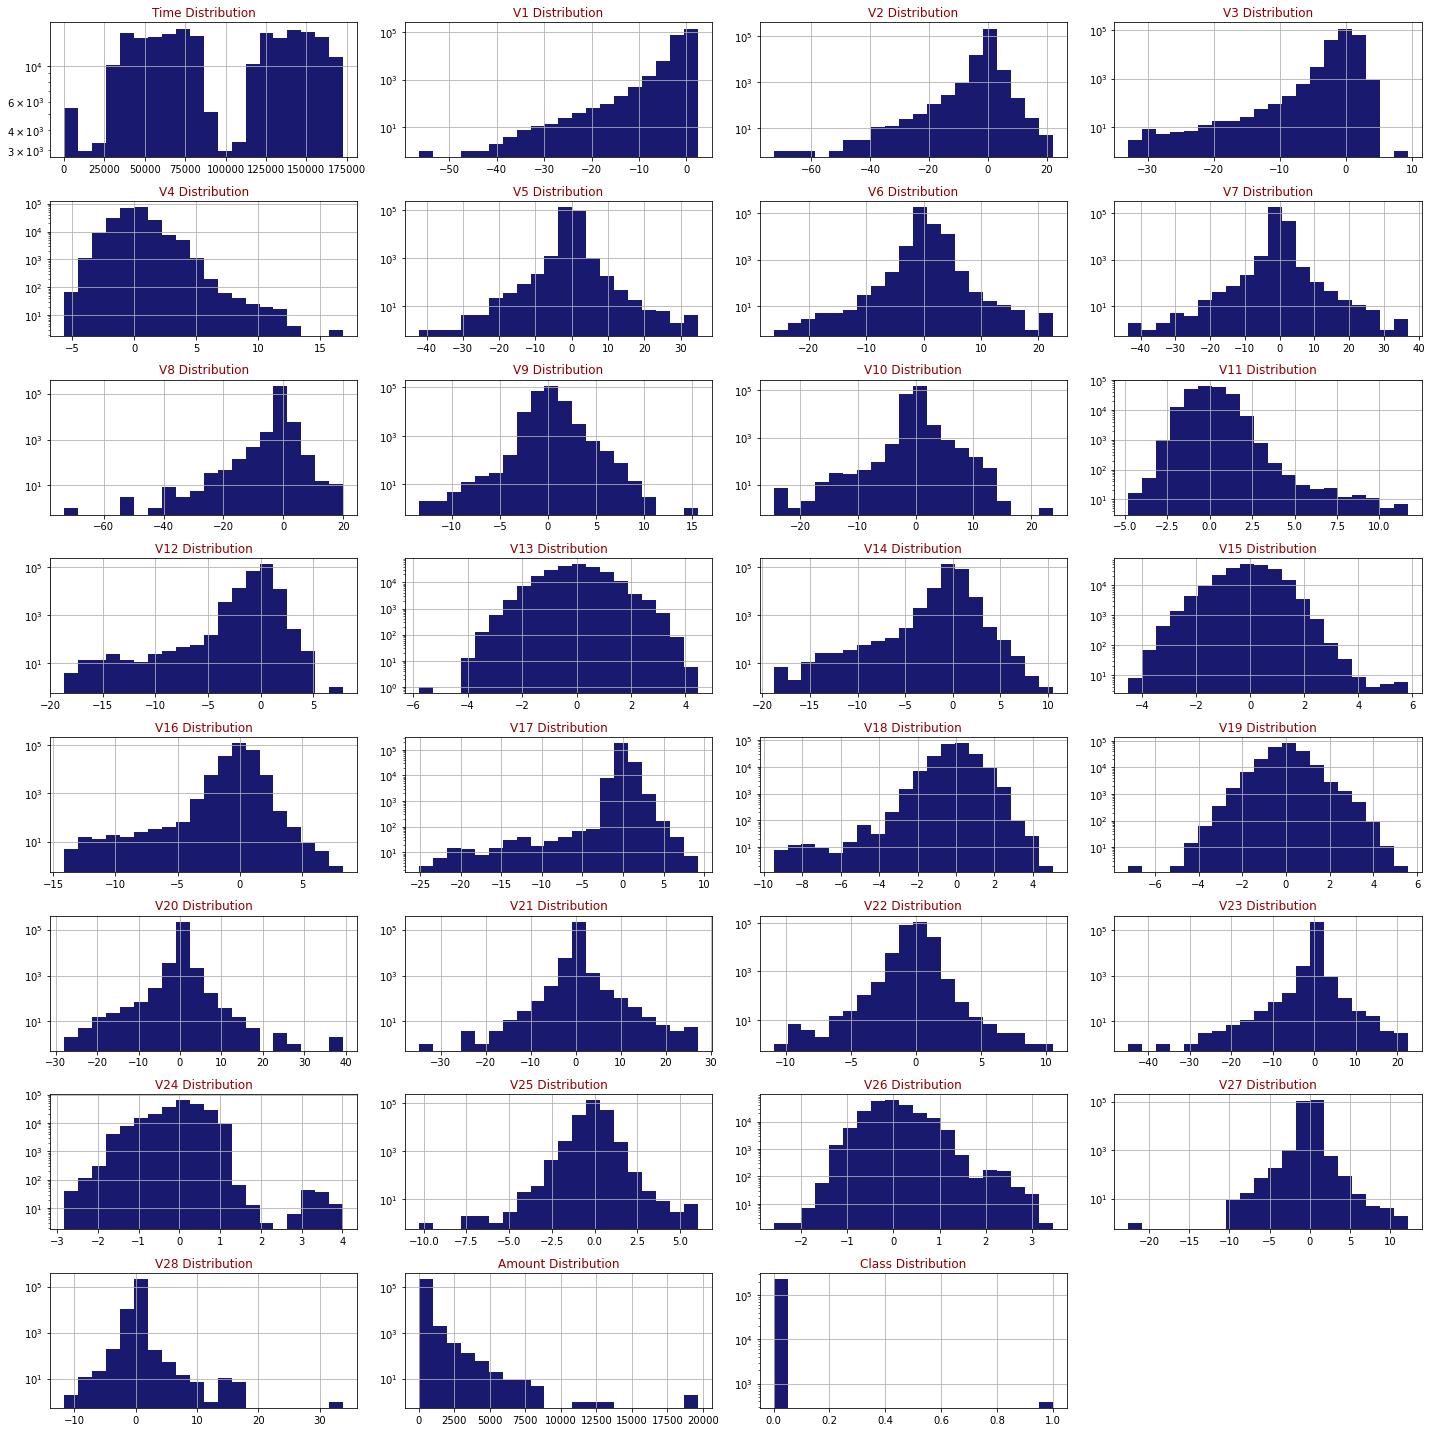

In [40]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(train_df,train_df.columns,8,4)

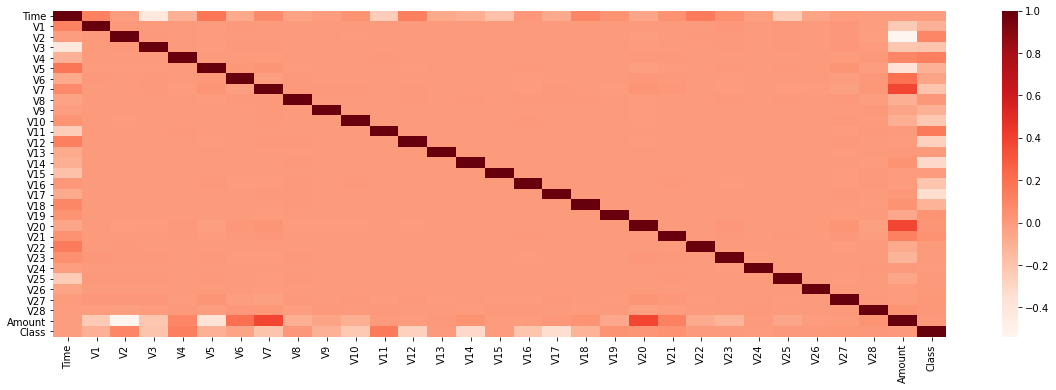

In [41]:
plt.figure(figsize=(20,6))
cor = train_df.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.yticks(rotation=0)
plt.show()

In [42]:
train_df.drop('Time', axis=1, inplace=True)

In [43]:
test_df.drop('Time', axis=1, inplace=True)

In [44]:
sc = StandardScaler()

amount = train_df['Amount'].values
train_df['Amount'] = sc.fit_transform(amount.reshape(-1,1))

In [45]:
sc = StandardScaler()

amount = test_df['Amount'].values
test_df['Amount'] = sc.fit_transform(amount.reshape(-1,1))

In [46]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [47]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print("\n\n")
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [48]:
columns = train_df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]

X = train_df[columns]
Y = train_df["Class"]

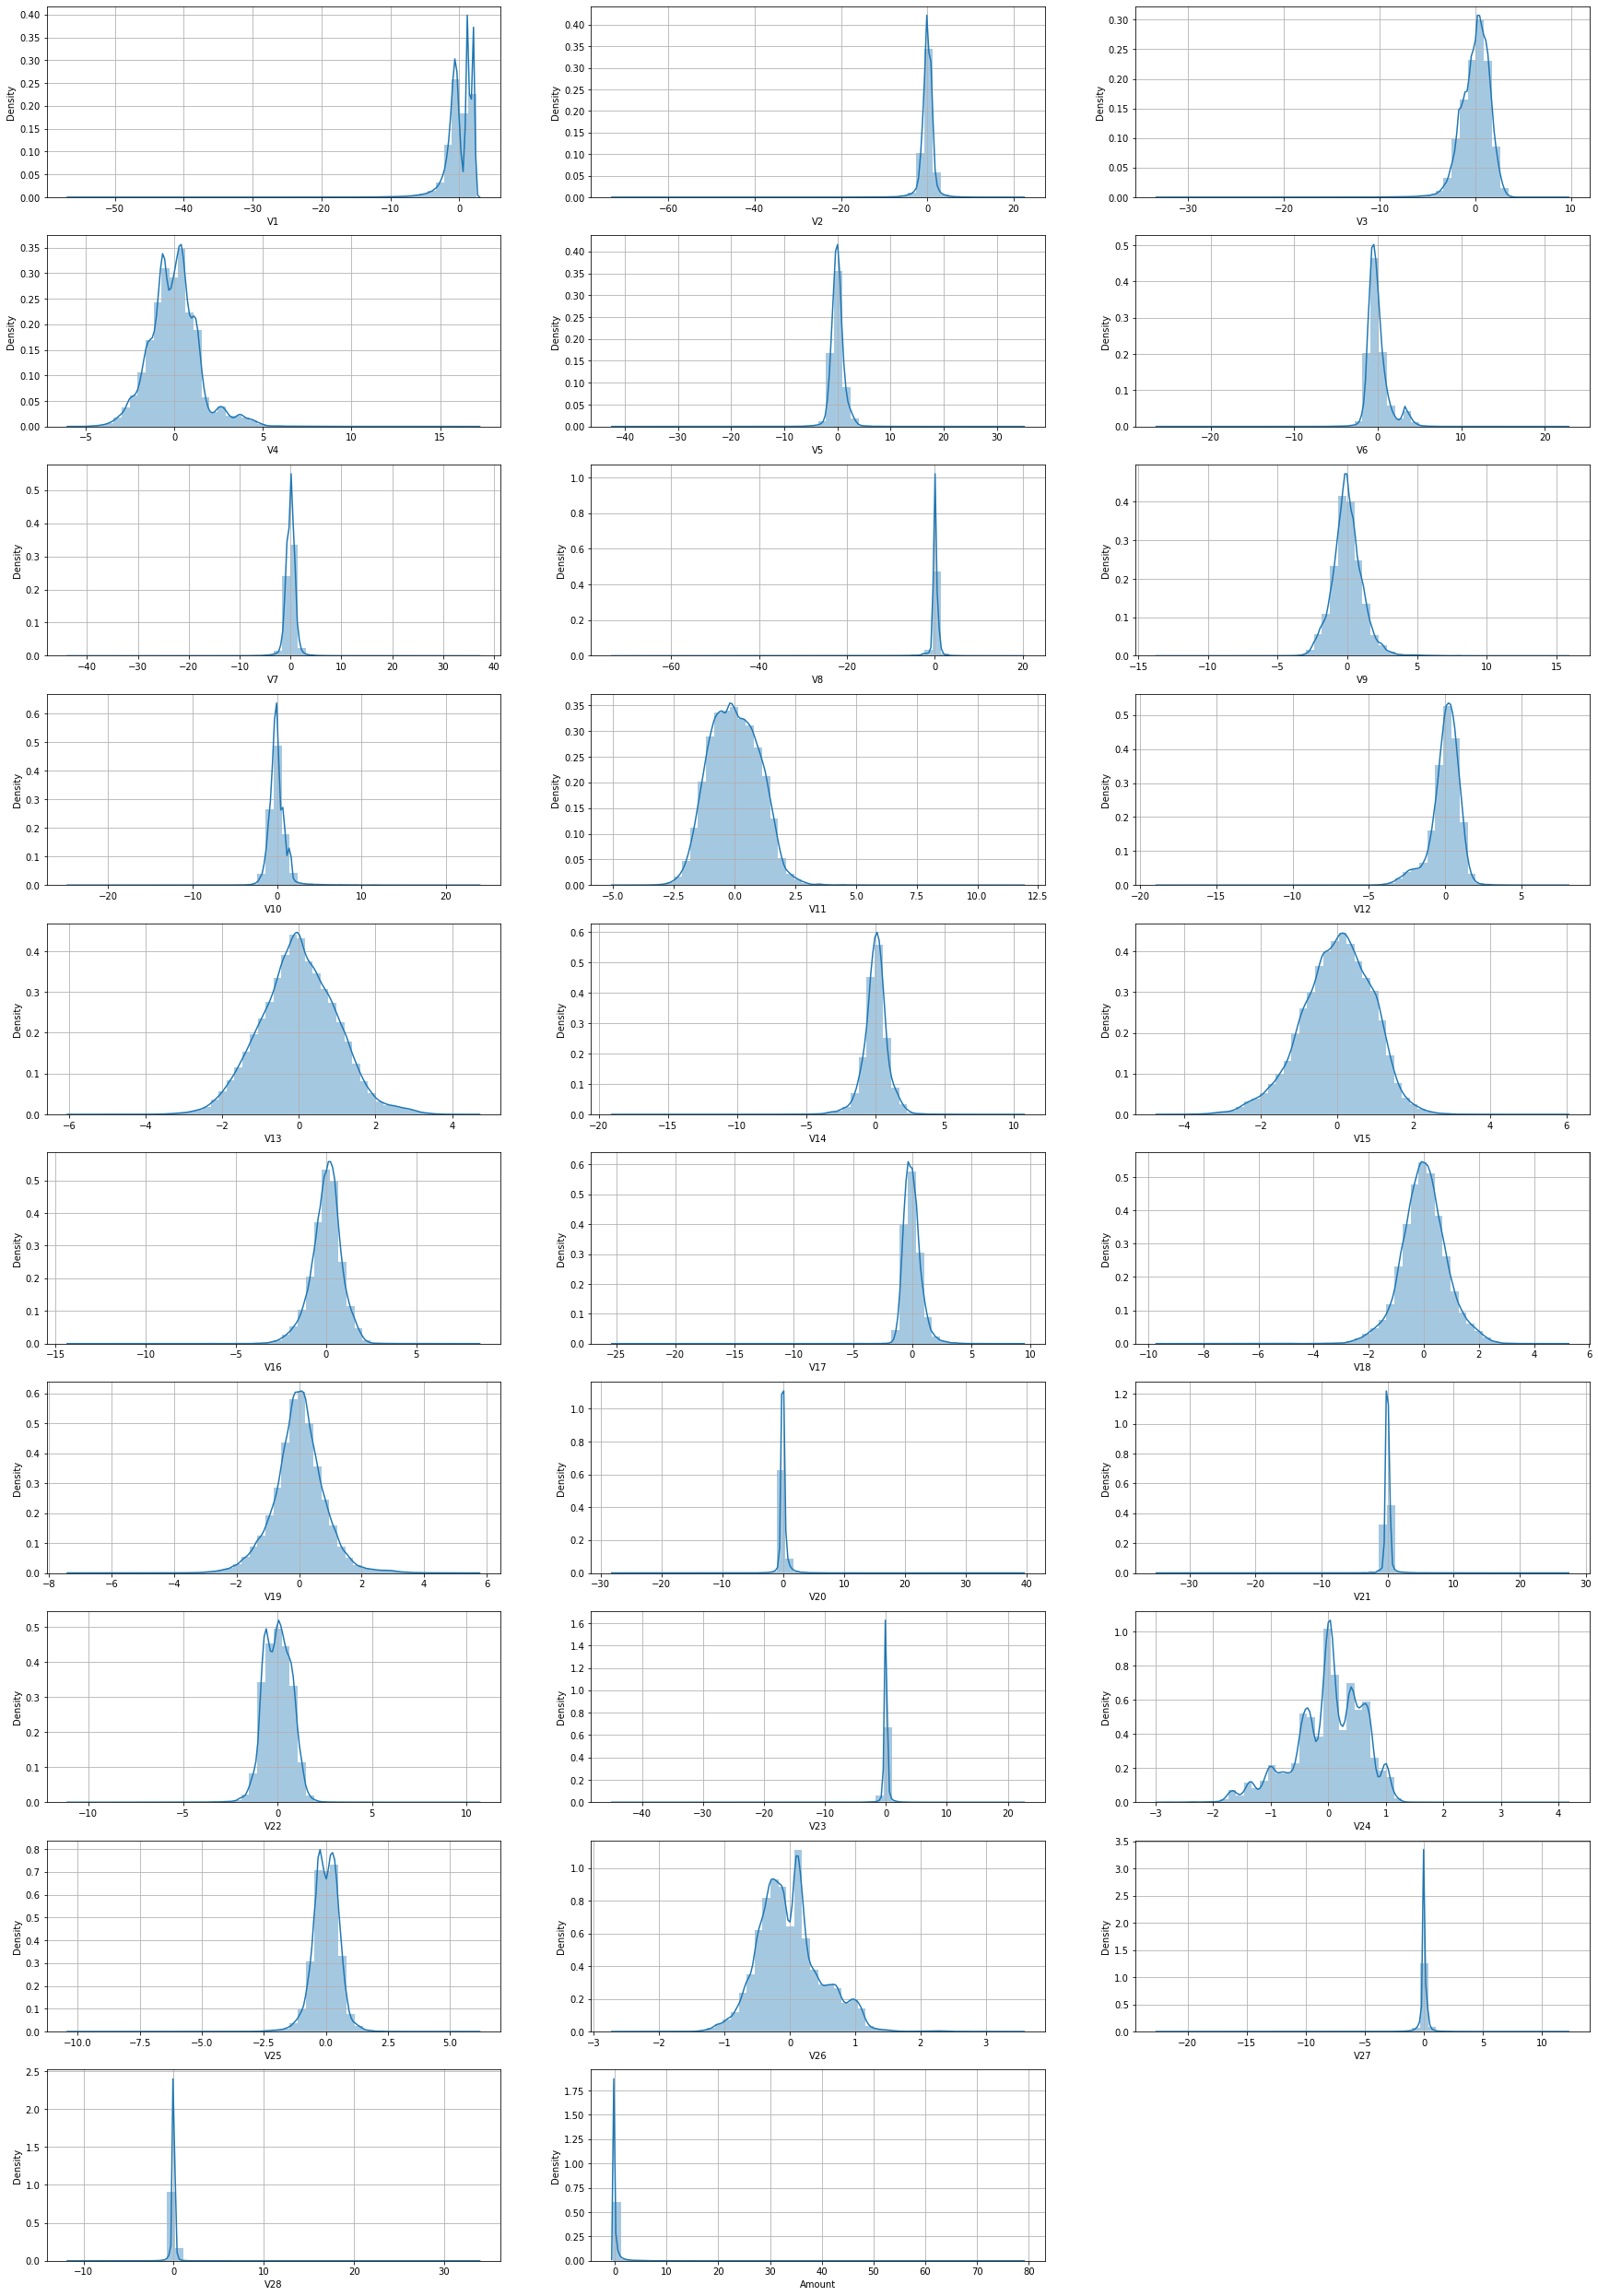

In [49]:
# plot the histogram of a variable from the dataset to see the skewness
var = X.columns

plt.figure(figsize=(30,45))
i=0
for col in var:
    i += 1
    plt.subplot(10,3, i)
    sns.distplot(X[col])
    plt.grid()

plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 9142)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(182276, 29)
(45569, 29)
(182276,)
(45569,)


In [52]:
#Undersampling 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=999199, replacement=True)
X_res, y_res = rus.fit_resample(X_train, y_train)

print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 312, 1: 312})


In [53]:
#Oversampling
from imblearn.over_sampling import RandomOverSampler

ros =  RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_ros)))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 181964, 1: 181964})


In [54]:
# SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 33)
X_train_new, y_train_new = sm.fit_resample(X_train, y_train)

print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_new)))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 181964, 1: 181964})


# Project Task: Week 2

Modeling Techniques:

Try out models like Naive Bayes, Logistic Regression or SVM. Find out which one performs the best

Use different Tree-based classifiers like Random Forest and XGBoost. 

    a.    Remember Tree-based classifiers work on two ideologies: Bagging or Boosting
    b.    Tree-based classifiers have fine-tuning parameters which takes care of the imbalanced class. Random-Forest and XGBboost.

Compare the results of 1 with 2 and check if there is any incremental gain.

In [55]:
log_class = LogisticRegression()
grid = {'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv = KFold(n_splits=5, shuffle=False, random_state=None)

In [56]:
clf = GridSearchCV(log_class, grid, cv=cv, n_jobs=-1, scoring='f1_macro')

In [57]:
clf.fit(X_train_new, y_train_new)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [58]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
clf_f1 = f1_score(y_test, y_pred)
clf_f1

[[44320  1167]
 [    5    77]]
0.974280761043692
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     45487
           1       0.06      0.94      0.12        82

    accuracy                           0.97     45569
   macro avg       0.53      0.96      0.55     45569
weighted avg       1.00      0.97      0.99     45569



0.11613876319758673

In [59]:
# Decision Tree 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_new, y_train_new)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.6min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [60]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,13.178996,0.221308,0.099002,0.033466,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.985633,0.984925,0.984756,0.984917,0.985120,0.985070,0.000304,7
1,11.911396,0.985831,0.058202,0.011320,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.985633,0.984909,0.984756,0.984917,0.985120,0.985067,0.000306,8
2,10.465797,0.171726,0.055000,0.005329,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.985732,0.984932,0.984638,0.985012,0.985057,0.985074,0.000360,5
3,10.256796,0.068028,0.059401,0.008524,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.985732,0.984932,0.984638,0.985012,0.985057,0.985074,0.000360,5
4,19.270195,0.036558,0.056203,0.002713,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998347,0.998148,0.997936,0.998409,0.998115,0.998191,0.000170,1


In [61]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9981910582625579
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [62]:
# Model with optimal hyperparameters
dt_imb_model = grid_search.best_estimator_

dt_imb_model.fit(X_train_new, y_train_new)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)

In [63]:
y_train_pred = dt_imb_model.predict(X_train_new)
display_scores(y_train_new, y_train_pred)

F1 Score: 98.56%



Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    181964
           1       0.99      0.99      0.99    181964

    accuracy                           0.99    363928
   macro avg       0.99      0.99      0.99    363928
weighted avg       0.99      0.99      0.99    363928



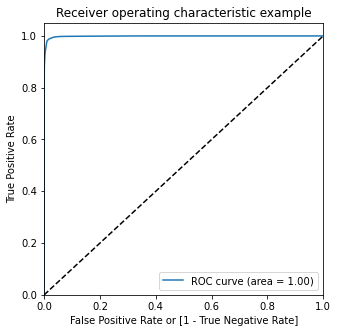

In [64]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train_new)[:,1]

# Plot the ROC curve
draw_roc(y_train_new, y_train_pred_proba)

In [65]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 18.18%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     45487
           1       0.10      0.89      0.18        82

    accuracy                           0.99     45569
   macro avg       0.55      0.94      0.59     45569
weighted avg       1.00      0.99      0.99     45569



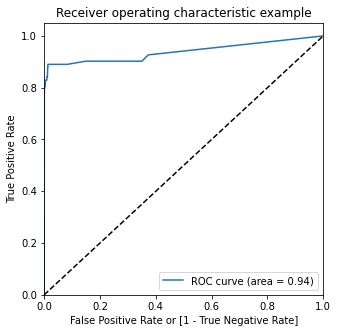

In [66]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [67]:
class_weight = dict({0:1,1:100})

In [68]:
classifier = RandomForestClassifier()
classifier.fit(X_train_new, y_train_new)

RandomForestClassifier()

In [69]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
classifier_f1 = f1_score(y_test, y_pred)
classifier_f1

[[45477    10]
 [   12    70]]
0.9995172156509908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45487
           1       0.88      0.85      0.86        82

    accuracy                           1.00     45569
   macro avg       0.94      0.93      0.93     45569
weighted avg       1.00      1.00      1.00     45569



0.8641975308641976

In [70]:
xgb = XGBClassifier(scale_pos_weight=100)
xgb.fit(X_train_new, y_train_new)

[16:46:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=100, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
xgb_f1 = f1_score(y_test, y_pred)
xgb_f1

[[45477    10]
 [   12    70]]
0.9995172156509908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45487
           1       0.88      0.85      0.86        82

    accuracy                           1.00     45569
   macro avg       0.94      0.93      0.93     45569
weighted avg       1.00      1.00      1.00     45569



0.8641975308641976

In [72]:
results = {'XgBoost':xgb_f1, 'RandomForest':classifier_f1, 'LogisticRegression': clf_f1}  
df = pd.DataFrame(results, index =['f1Score']) 
df

,XgBoost,RandomForest,LogisticRegression
f1Score,0.864198,0.864198,0.116139


# Project Task: Week 3

Applying ANN:

1. Use ANN (Artificial Neural Network) to identify fradulent and non-fradulent.
       a)    Fine-tune number of layers
       b)    Number of Neurons in each layers
       c)    Experiment in batch-size
       d)    Experiment with number of epochs. Check the observations in loss and accuracy
       e)    Play with different Learning Rate variants of Gradient Descent like Adam, SGD, RMS-prop
       f)    Find out which activation performs best for this use case and why?
       g)    Check Confusion Matrix, Precision, Recall and F1-Score
2.    Try out Dropout for ANN. How is it performed? Compare model performance with the traditional ML based prediction models from above. 
3.    Find the best setting of neural net that can be best classified as fraudulent and non-fraudulent transactions. Use techniques like Grid Search, Cross-Validation and Random search.

Anomaly Detection:

4.     Implement anomaly detection algorithms.
        a)    Assume that the data is coming from a single or a combination of multivariate Gaussian
        b)    Formalize a scoring criterion, which gives a scoring probability for the given data point whether it belongs to the multivariate Gaussian or Normal Distribution fitted in a)

In [73]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [74]:
scaler = StandardScaler()

In [75]:
scaled_xtrain = scaler.fit_transform(X_train_new)
scaled_xtest = scaler.fit_transform(X_test)

In [76]:
scaled_xtrain3d = scaled_xtrain.reshape(scaled_xtrain.shape[0],scaled_xtrain.shape[1],1)
scaled_xtest3d = scaled_xtest.reshape(scaled_xtest.shape[0],scaled_xtest.shape[1],1)

scaled_xtrain3d.shape, scaled_xtest3d.shape

((363928, 29, 1), (45569, 29, 1))

# Implementing CNN for Credit card fraud detection 

In [77]:
cnn = Sequential()
cnn.add(Conv1D(32, 2, activation = "relu", input_shape = (29,1)))
cnn.add(Dropout(0.1))
cnn.add(BatchNormalization()) 
cnn.add(Conv1D(64, 2, activation = "relu"))
cnn.add(Dropout(0.2)) 
cnn.add(Flatten())
cnn.add(Dropout(0.4))
cnn.add(Dense(64, activation = "relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation = "sigmoid"))

In [78]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 28, 32)            96        
_________________________________________________________________
dropout (Dropout)            (None, 28, 32)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 32)            128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 27, 64)            4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 27, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1728)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1728)              0

In [79]:
cnn.compile(optimizer = Adam(lr=0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])

In [80]:
history = cnn.fit(scaled_xtrain3d, y_train_new, epochs = 20, validation_data=(scaled_xtest3d, y_test), verbose=1)

Epoch 1/20
11373/11373 [==============================] - 68s 6ms/step - loss: 0.1588 - accuracy: 0.9375 - val_loss: 3.5841 - val_accuracy: 0.2834
Epoch 2/20
11373/11373 [==============================] - 65s 6ms/step - loss: 0.0637 - accuracy: 0.9760 - val_loss: 2.6116 - val_accuracy: 0.4331
Epoch 3/20
11373/11373 [==============================] - 65s 6ms/step - loss: 0.0428 - accuracy: 0.9849 - val_loss: 2.2405 - val_accuracy: 0.5219
Epoch 4/20
11373/11373 [==============================] - 65s 6ms/step - loss: 0.0331 - accuracy: 0.9887 - val_loss: 2.5773 - val_accuracy: 0.5022
Epoch 5/20
11373/11373 [==============================] - 65s 6ms/step - loss: 0.0277 - accuracy: 0.9907 - val_loss: 2.8222 - val_accuracy: 0.4812
Epoch 6/20
11373/11373 [==============================] - 65s 6ms/step - loss: 0.0248 - accuracy: 0.9921 - val_loss: 3.0468 - val_accuracy: 0.4747
Epoch 7/20
11373/11373 [==============================] - 65s 6ms/step - loss: 0.0226 - accuracy: 0.9928 - val_loss: 3

# Project Task: Week 4

Inference and Observations:

Visualize the scores for Fraudulent and Non-Fraudulent transactions.
Find out the threshold value for marking or reporting a transaction as fraudulent in your anomaly detection system.
Can this score be used as an engineered feature in the models developed previously? Are there any incremental gains in F1-Score? Why or Why not?
Be as creative as possible in finding other interesting insights.

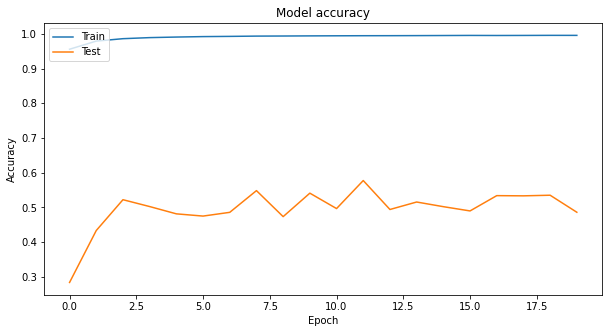

In [81]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

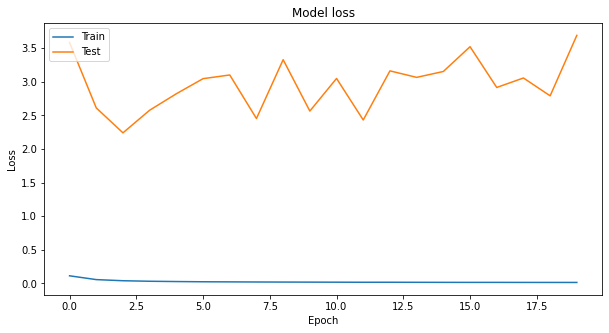

In [82]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

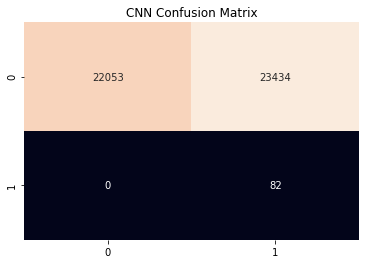

In [83]:
from sklearn.metrics import confusion_matrix
cnn_predictions = cnn.predict_classes(scaled_xtest3d)
confusion_matrix = confusion_matrix(y_test, cnn_predictions)
sns.heatmap(confusion_matrix, annot=True, fmt="d", cbar = False)
plt.title("CNN Confusion Matrix")
plt.show()

In [84]:
accuracy_score(y_test, cnn_predictions)

0.48574688933266036

In [85]:
from sklearn.metrics import precision_recall_fscore_support as score

In [86]:
precision, recall, fscore, support = score(y_test, cnn_predictions)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [1.         0.00348699]
recall: [0.48481984 1.        ]
fscore: [0.65303524 0.00694974]
support: [45487    82]
